In [1]:
# Import required libraries\n
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import torch
import plotly.express as px
    
    # Configure matplotlib for inline display\n
#plt.style.use('seaborn')

In [2]:
# Load local CSV files
import pandas as pd

"# Load local CSV files using relative paths\n",
df_cu_bre = pd.read_csv(r"D:\a\cyPhy\CyPhy\Master\BREMaster.csv")
df_phy_bre = pd.read_csv(r"D:\a\Master\Phy_BRE_Master.csv")
df_phy_cu = pd.read_csv(r"D:\a\cyPhy\CyPhy\Master\CUMaster.csv")
df_phy_cu_bre = pd.read_csv(r"D:\a\cyPhy\CyPhy\Master\BREMaster.csv")

# Optionally, merge datasets
df = df_phy_cu_bre.copy()  # Start with full merged dataset

# Preview
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671187 entries, 0 to 2671186
Data columns (total 95 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   Timestamp                             object 
 1   OC-02-S1_temperature                  float64
 2   OC-02-S1_contact                      float64
 3   OC-02-S1_tamper                       float64
 4   OC-01-HWA_temperature                 float64
 5   OC-01-HWA_tamper                      float64
 6   OC-00-H1_tamper                       float64
 7   OC-00-H1_contact_x                    float64
 8   OC-00-H1_temperature                  float64
 9   A6-00-HW_humidity                     float64
 10  A6-00-HW_temperature                  float64
 11  A6-00-HW_motion                       float64
 12  A6-00-HW_illuminance                  float64
 13  A6-00-HW_tamper                       float64
 14  A6-02-SL_humidity                     float64
 15  A6-02-SL_temper

,Timestamp,OC-02-S1_temperature,OC-02-S1_contact,OC-02-S1_tamper,OC-01-HWA_temperature,OC-01-HWA_tamper,OC-00-H1_tamper,OC-00-H1_contact_x,OC-00-H1_temperature,A6-00-HW_humidity,...,A6-00-K1_motion_y,A6-00-K1_temperature_y,A6-00-K1_tamper_y,A6-01-B1_humidity_y,A6-01-B1_illuminance_y,A6-01-B1_motion_y,A6-01-B1_temperature_y,OC-00-L1_contact,OC-01-HB_contact,OC-01-BD_contact
0,2022-10-18 00:00:00,17.3,1.0,1.0,20.6,1.0,0.0,0.0,20.4,53.0,...,0.0,20.5,0.0,53.0,0.0,0.0,20.4,1.0,1.0,1.0
1,2022-10-18 00:00:01,17.3,1.0,1.0,20.6,1.0,0.0,0.0,20.4,53.0,...,0.0,20.5,0.0,53.0,0.0,0.0,20.4,1.0,1.0,1.0
2,2022-10-18 00:00:02,17.3,1.0,1.0,20.6,1.0,0.0,0.0,20.4,53.0,...,0.0,20.5,0.0,53.0,0.0,0.0,20.4,1.0,1.0,1.0
3,2022-10-18 00:00:03,17.3,1.0,1.0,20.6,1.0,0.0,0.0,20.4,53.0,...,0.0,20.5,0.0,53.0,0.0,0.0,20.4,1.0,1.0,1.0
4,2022-10-18 00:00:04,17.3,1.0,1.0,20.6,1.0,0.0,0.0,20.4,53.0,...,0.0,20.5,0.0,53.0,0.0,0.0,20.4,1.0,1.0,1.0


In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Show initial shape and info
print("Original shape:", df.shape)
print(df.info())

Original shape: (2671187, 95)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671187 entries, 0 to 2671186
Data columns (total 95 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   Timestamp                             object 
 1   OC-02-S1_temperature                  float64
 2   OC-02-S1_contact                      float64
 3   OC-02-S1_tamper                       float64
 4   OC-01-HWA_temperature                 float64
 5   OC-01-HWA_tamper                      float64
 6   OC-00-H1_tamper                       float64
 7   OC-00-H1_contact_x                    float64
 8   OC-00-H1_temperature                  float64
 9   A6-00-HW_humidity                     float64
 10  A6-00-HW_temperature                  float64
 11  A6-00-HW_motion                       float64
 12  A6-00-HW_illuminance                  float64
 13  A6-00-HW_tamper                       float64
 14  A6-02-SL_humidity                   

In [4]:
# Drop fully empty columns
df = df.dropna(axis=1, how='all')

In [5]:
df = df.loc[:, df.nunique() > 1]   # drop columns with only 1 unique value


In [6]:

# Drop duplicated rows if any
df = df.drop_duplicates()

In [7]:
# Drop rows with too many NaNs
df = df.dropna(thresh=int(0.8 * df.shape[1]))  # keep rows with at least 80% non-null


In [8]:
# Fill remaining NaNs in numerical columns with median
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [9]:
# Fill NaNs in categorical/object columns with a placeholder
cat_cols = df.select_dtypes(include=["object", "category"]).columns
df[cat_cols] = df[cat_cols].fillna("Unknown")

In [10]:
# Reset index
df = df.reset_index(drop=True)

In [11]:
# Print summary after cleaning
print("Cleaned shape:", df.shape)
print("Remaining NaNs:", df.isnull().sum().sum())

Cleaned shape: (2671187, 86)
Remaining NaNs: 0


In [11]:

# Preview cleaned data
df.head()

,Timestamp,OC-02-S1_temperature,OC-02-S1_contact,OC-02-S1_tamper,OC-01-HWA_temperature,OC-01-HWA_tamper,OC-00-H1_tamper,OC-00-H1_contact_x,OC-00-H1_temperature,A6-00-HW_humidity,...,A6-00-K1_humidity_y,A6-00-K1_illuminance_y,A6-00-K1_motion_y,A6-00-K1_temperature_y,A6-01-B1_humidity_y,A6-01-B1_illuminance_y,A6-01-B1_temperature_y,OC-00-L1_contact,OC-01-HB_contact,OC-01-BD_contact
0,2022-10-18 00:00:00,17.3,1.0,1.0,20.6,1.0,0.0,0.0,20.4,53.0,...,53.0,0.0,0.0,20.5,53.0,0.0,20.4,1.0,1.0,1.0
1,2022-10-18 00:00:01,17.3,1.0,1.0,20.6,1.0,0.0,0.0,20.4,53.0,...,53.0,0.0,0.0,20.5,53.0,0.0,20.4,1.0,1.0,1.0
2,2022-10-18 00:00:02,17.3,1.0,1.0,20.6,1.0,0.0,0.0,20.4,53.0,...,53.0,0.0,0.0,20.5,53.0,0.0,20.4,1.0,1.0,1.0
3,2022-10-18 00:00:03,17.3,1.0,1.0,20.6,1.0,0.0,0.0,20.4,53.0,...,53.0,0.0,0.0,20.5,53.0,0.0,20.4,1.0,1.0,1.0
4,2022-10-18 00:00:04,17.3,1.0,1.0,20.6,1.0,0.0,0.0,20.4,53.0,...,53.0,0.0,0.0,20.5,53.0,0.0,20.4,1.0,1.0,1.0


In [12]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')


In [16]:

# Import required libraries for autoencoder
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:

# Sample 10% of the data for training
#df = df.sample(frac=0.1, random_state=42)
# Sample 30% of the data for training
df = df.sample(frac=0.3, random_state=42)


In [18]:
# Prepare data for autoencoder
# First, let's select numerical columns and scale them
numerical_cols = df.select_dtypes(include=['float64']).columns
X = df[numerical_cols].values

In [19]:
# Data Preparation
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, X_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=1024, shuffle=True)

In [20]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16)
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim)
        )
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [21]:
def train_autoencoder(model, train_loader, criterion, optimizer, num_epochs=50, patience=5):
    model.train()
    train_losses = []
    best_loss = float('inf')
    patience_counter = 0
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        for data, _ in train_loader:
            # Forward pass
            outputs = model(data)
            loss = criterion(outputs, data)
            
            # Backward pass and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)
        
        # Early stopping
        if epoch_loss < best_loss:
            best_loss = epoch_loss
            patience_counter = 0
        else:
            patience_counter += 1
            
        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            break
            
        if (epoch + 1) % 5 == 0:  # Print more frequently
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')
    
    return train_losses
# When calling the training function, store the returned train_losses
#train_losses=train_autoencoder(model, train_loader, criterion, optimizer)

In [22]:
# Define the model
input_dim = X_train.shape[1] 
model = Autoencoder(input_dim)

In [23]:
# Define the loss function
criterion = nn.MSELoss()  # Mean Squared Error Loss for reconstruction

In [25]:
# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Using Adam optimizer with learning rate 0.001

In [26]:
# Train the model and store the training losses
train_losses = train_autoencoder(model, train_loader, criterion, optimizer)

Epoch [5/50], Loss: 0.0831
Epoch [10/50], Loss: 0.0524
Epoch [15/50], Loss: 0.0449
Epoch [20/50], Loss: 0.0389
Epoch [25/50], Loss: 0.0337
Epoch [30/50], Loss: 0.0284
Epoch [35/50], Loss: 0.0251
Epoch [40/50], Loss: 0.0241
Epoch [45/50], Loss: 0.0240
Epoch [50/50], Loss: 0.0224


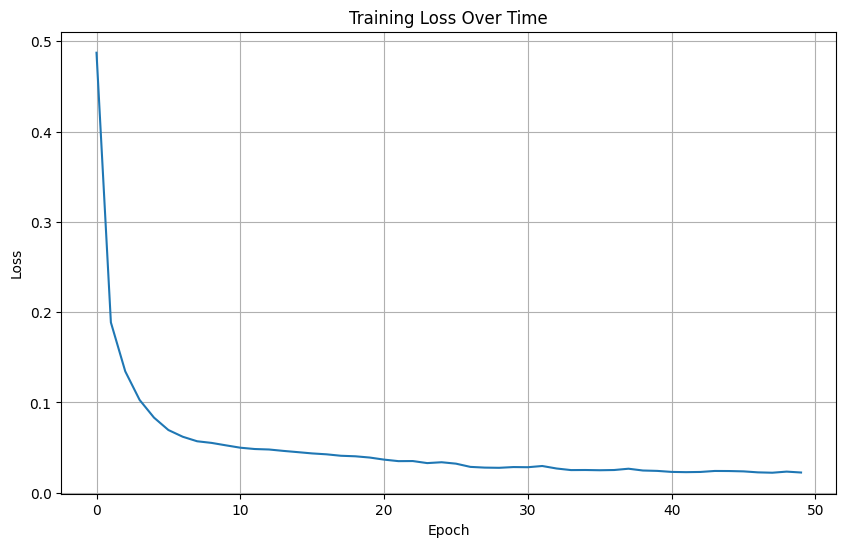

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [29]:
# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cpu


In [30]:
# Set model to evaluation mode
model.eval()

# Get reconstructions for test data
with torch.no_grad():
    # Move test data to device (if using GPU)
    X_test_tensor = X_test_tensor.to(device)
    
    # Get reconstructions
    test_reconstructions = model(X_test_tensor)
    
    # Calculate reconstruction error
    reconstruction_error = torch.mean((X_test_tensor - test_reconstructions) ** 2, dim=1)
    
    # Convert to numpy for easier plotting
    reconstruction_error = reconstruction_error.cpu().numpy()

# Print some statistics
print("\nReconstruction Error Statistics:")
print(f"Mean: {np.mean(reconstruction_error):.4f}")
print(f"Std: {np.std(reconstruction_error):.4f}")
print(f"Min: {np.min(reconstruction_error):.4f}")
print(f"Max: {np.max(reconstruction_error):.4f}")


Reconstruction Error Statistics:
Mean: 0.0214
Std: 0.1248
Min: 0.0007
Max: 15.0058



Additional Statistics:
Median: 0.0086
95th percentile: 0.0769
99th percentile: 0.1559


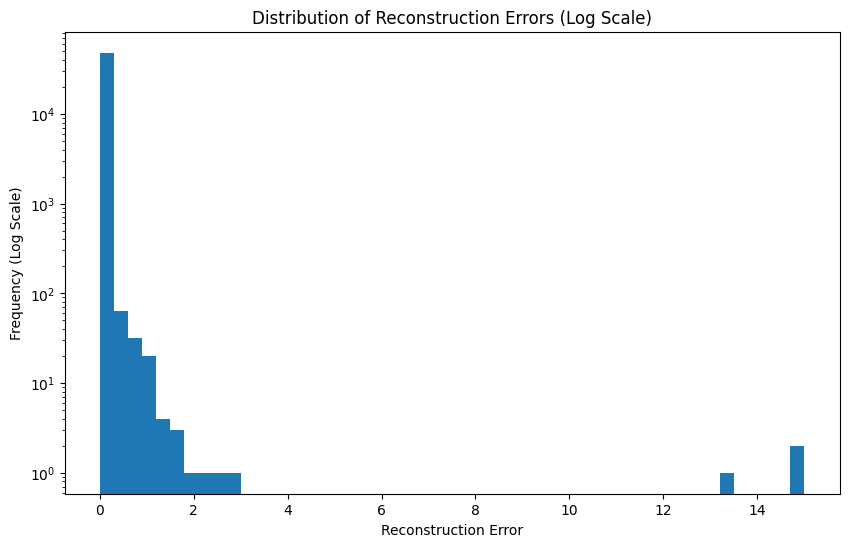

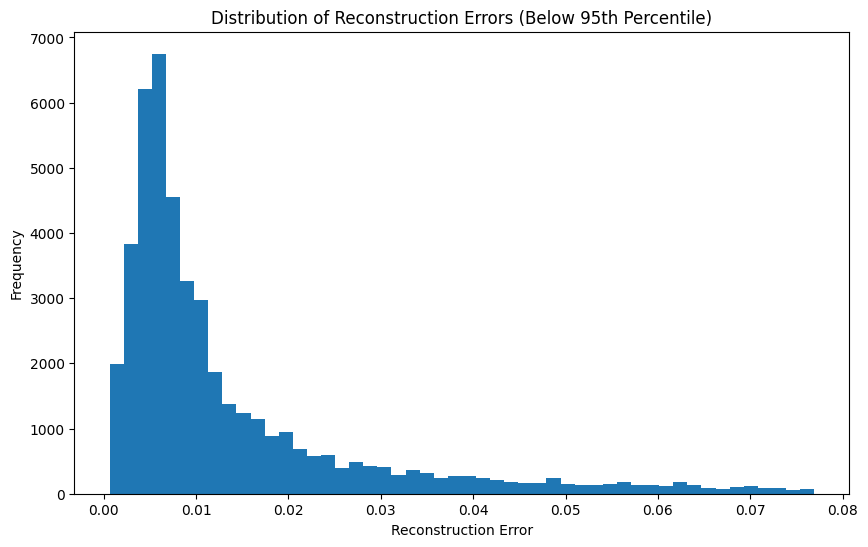

In [32]:
# Calculate additional statistics
print("\nAdditional Statistics:")
print(f"Median: {np.median(reconstruction_error):.4f}")
print(f"95th percentile: {np.percentile(reconstruction_error, 95):.4f}")
print(f"99th percentile: {np.percentile(reconstruction_error, 99):.4f}")

# Plot the error distribution with log scale
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_error, bins=50, log=True)
plt.title('Distribution of Reconstruction Errors (Log Scale)')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency (Log Scale)')
plt.show()

# Plot the error distribution for errors below the 95th percentile
threshold_95 = np.percentile(reconstruction_error, 95)
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_error[reconstruction_error < threshold_95], bins=50)
plt.title('Distribution of Reconstruction Errors (Below 95th Percentile)')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.show()

In [34]:
# Define different thresholds for anomaly detection
threshold_95 = np.percentile(reconstruction_error, 95)  # 0.1449
threshold_99 = np.percentile(reconstruction_error, 99)  # 0.3210
threshold_std = np.mean(reconstruction_error) + 2 * np.std(reconstruction_error)  # More conservative

# Identify anomalies using different thresholds
anomalies_95 = reconstruction_error > threshold_95
anomalies_99 = reconstruction_error > threshold_99
anomalies_std = reconstruction_error > threshold_std

# Print results
print("\nAnomaly Detection Results:")
print(f"95th percentile threshold: {threshold_95:.4f}")
print(f"Number of anomalies (95th): {np.sum(anomalies_95)}")
print(f"Percentage of anomalies (95th): {(np.sum(anomalies_95) / len(anomalies_95)) * 100:.2f}%")
print(f"\n99th percentile threshold: {threshold_99:.4f}")
print(f"Number of anomalies (99th): {np.sum(anomalies_99)}")
print(f"Percentage of anomalies (99th): {(np.sum(anomalies_99) / len(anomalies_99)) * 100:.2f}%")


Anomaly Detection Results:
95th percentile threshold: 0.0769
Number of anomalies (95th): 2404
Percentage of anomalies (95th): 5.00%

99th percentile threshold: 0.1559
Number of anomalies (99th): 481
Percentage of anomalies (99th): 1.00%


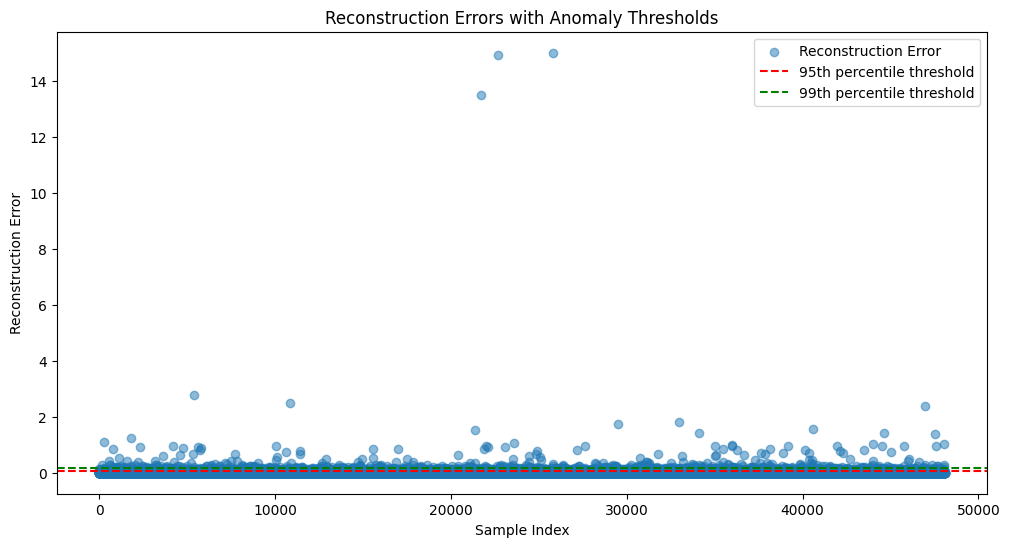

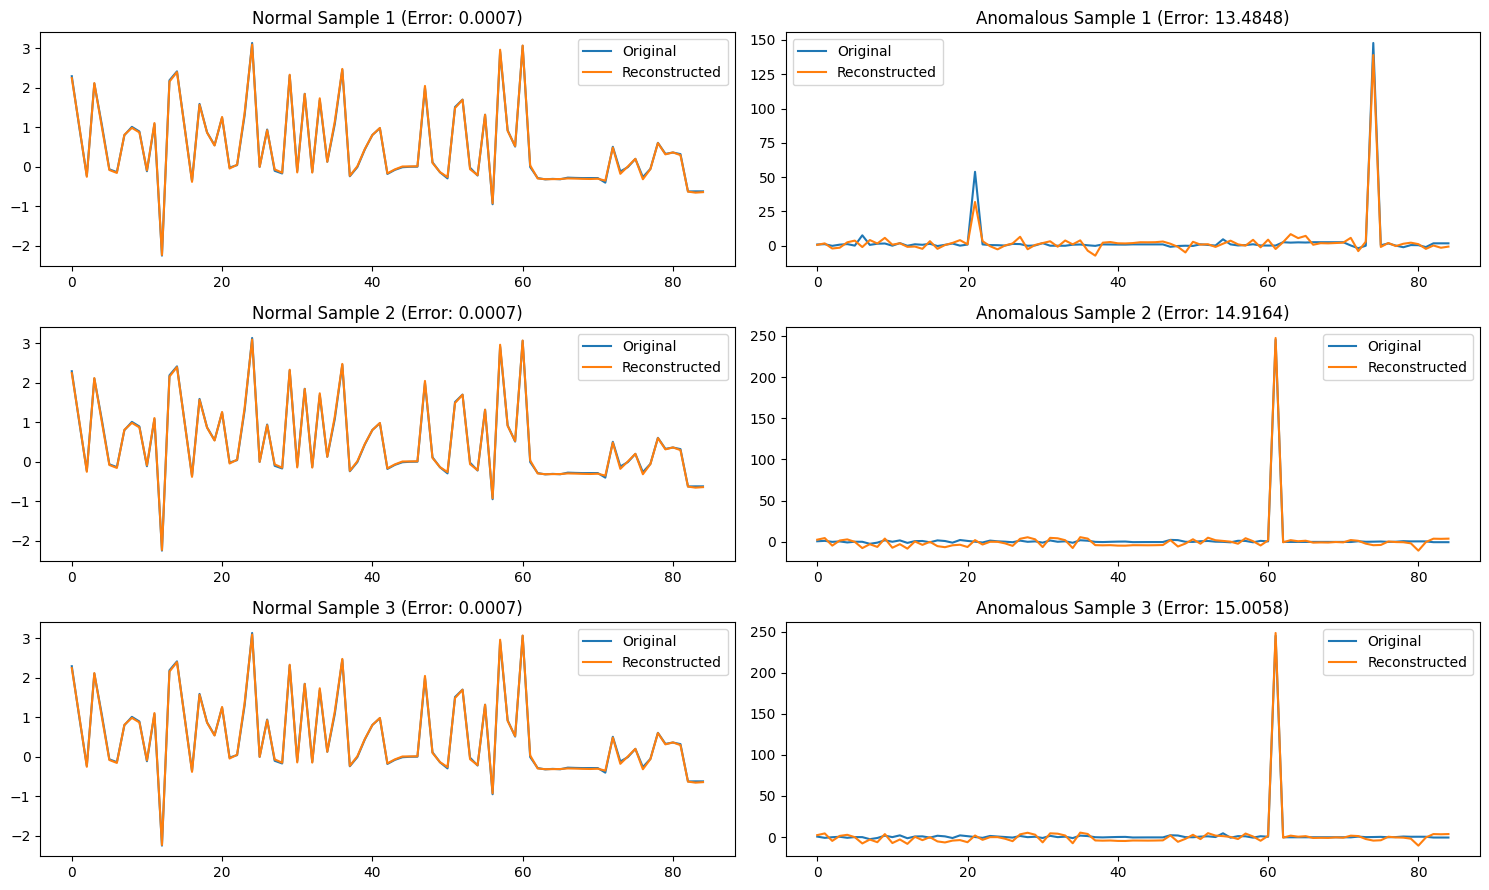

In [35]:
# Plot reconstruction errors with thresholds
plt.figure(figsize=(12, 6))
plt.scatter(range(len(reconstruction_error)), reconstruction_error, alpha=0.5, label='Reconstruction Error')
plt.axhline(y=threshold_95, color='r', linestyle='--', label='95th percentile threshold')
plt.axhline(y=threshold_99, color='g', linestyle='--', label='99th percentile threshold')
plt.title('Reconstruction Errors with Anomaly Thresholds')
plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.show()

# Plot some examples of normal and anomalous samples
def plot_normal_vs_anomaly(original, reconstructed, errors, n_samples=3):
    # Get indices of normal and anomalous samples
    normal_indices = np.argsort(errors)[:n_samples]
    anomaly_indices = np.argsort(errors)[-n_samples:]
    
    plt.figure(figsize=(15, 3*n_samples))
    
    # Plot normal samples
    for i, idx in enumerate(normal_indices):
        plt.subplot(n_samples, 2, 2*i+1)
        plt.plot(original[idx].cpu().numpy(), label='Original')
        plt.plot(reconstructed[idx].cpu().numpy(), label='Reconstructed')
        plt.title(f'Normal Sample {i+1} (Error: {errors[idx]:.4f})')
        plt.legend()
    
    # Plot anomalous samples
    for i, idx in enumerate(anomaly_indices):
        plt.subplot(n_samples, 2, 2*i+2)
        plt.plot(original[idx].cpu().numpy(), label='Original')
        plt.plot(reconstructed[idx].cpu().numpy(), label='Reconstructed')
        plt.title(f'Anomalous Sample {i+1} (Error: {errors[idx]:.4f})')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Plot normal vs anomalous samples
plot_normal_vs_anomaly(X_test_tensor, test_reconstructions, reconstruction_error)

In [36]:
# Create a DataFrame with anomaly detection results
anomaly_results = pd.DataFrame({
    'reconstruction_error': reconstruction_error,
    'is_anomaly_95': anomalies_95,
    'is_anomaly_99': anomalies_99,
    'is_anomaly_std': anomalies_std
})

# Save results
anomaly_results.to_csv('anomaly_detection_results.csv', index=False)

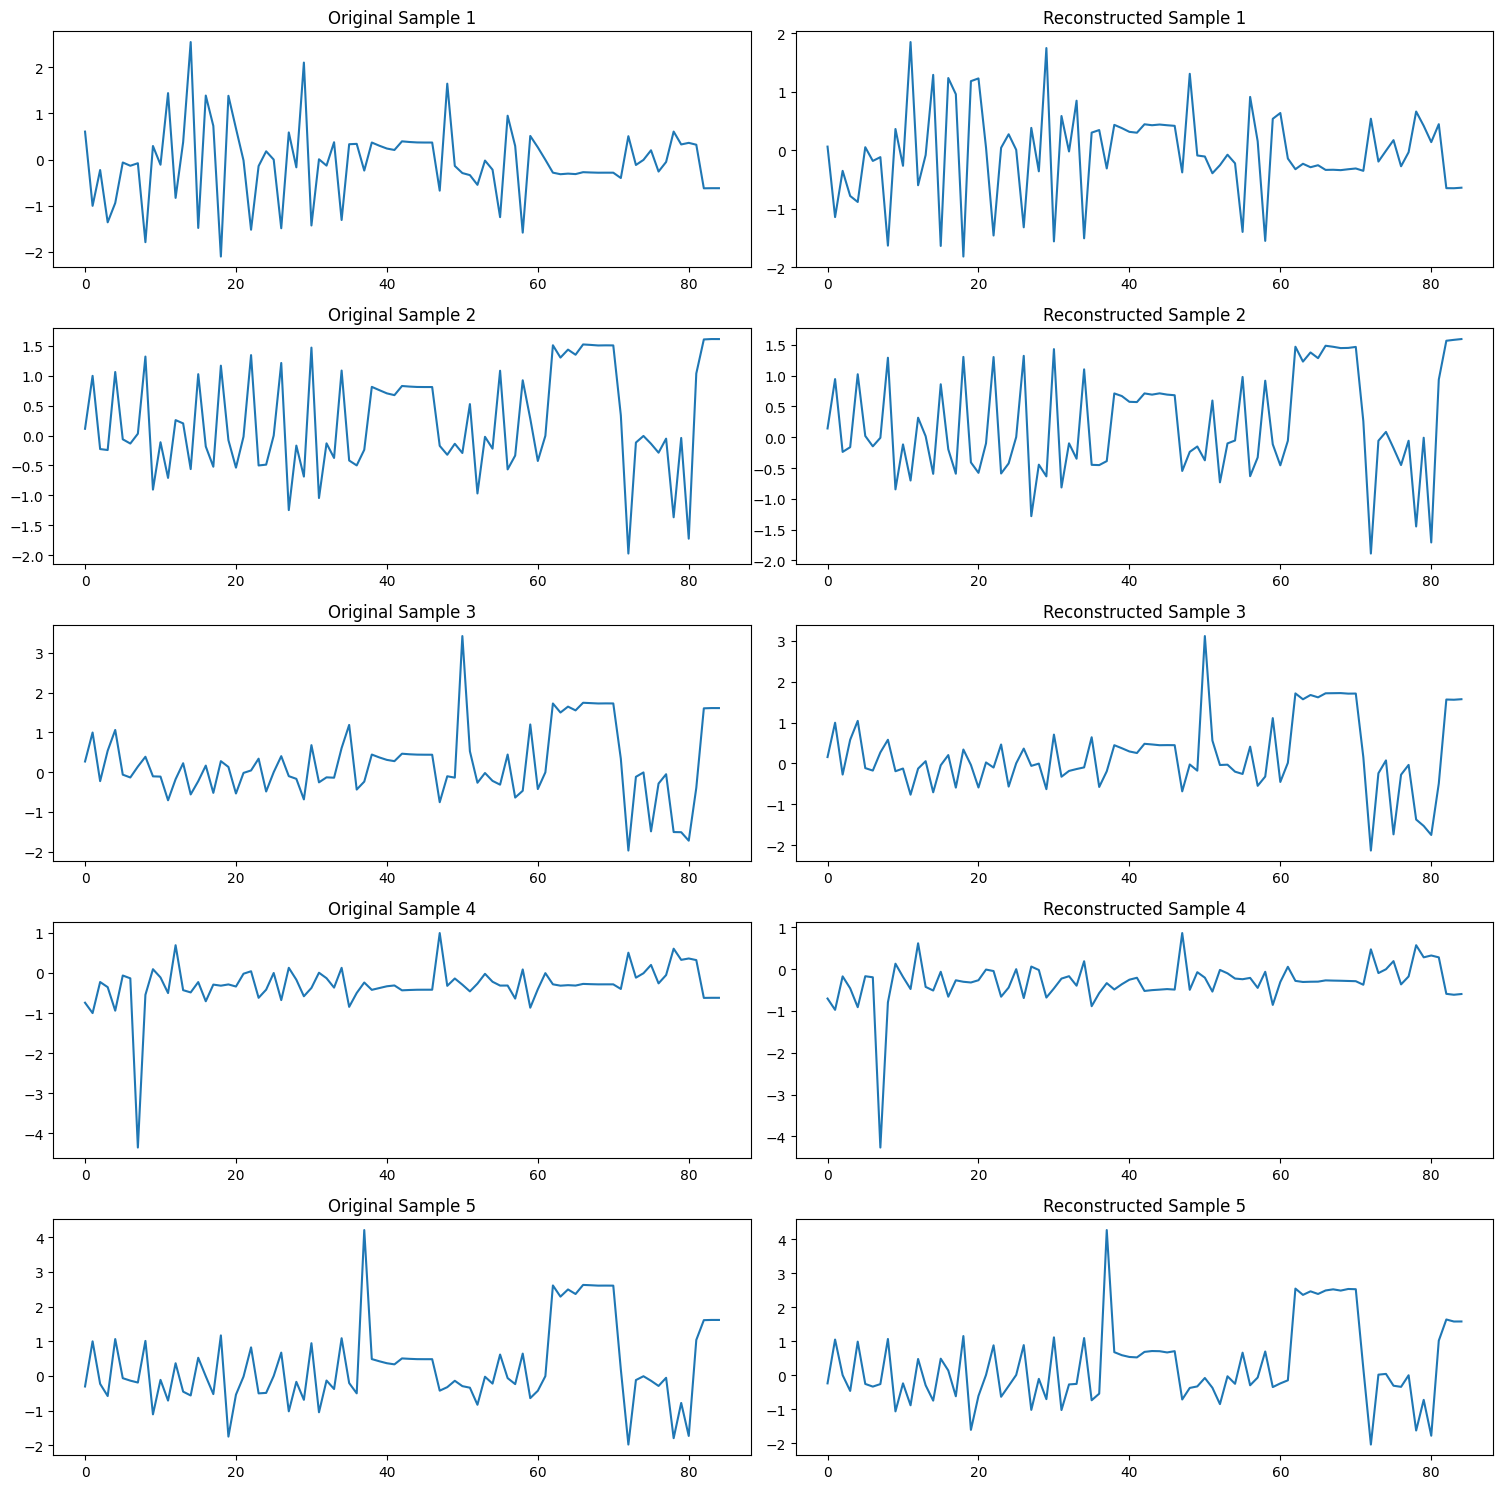

In [37]:
def plot_reconstruction(original, reconstructed, n_samples=5):
    # Convert to numpy and move to CPU if needed
    if torch.is_tensor(original):
        original = original.cpu().numpy()
    if torch.is_tensor(reconstructed):
        reconstructed = reconstructed.cpu().numpy()
    
    # Select random samples
    indices = np.random.choice(len(original), n_samples, replace=False)
    
    plt.figure(figsize=(15, 3*n_samples))
    for i, idx in enumerate(indices):
        plt.subplot(n_samples, 2, 2*i+1)
        plt.plot(original[idx])
        plt.title(f'Original Sample {i+1}')
        
        plt.subplot(n_samples, 2, 2*i+2)
        plt.plot(reconstructed[idx])
        plt.title(f'Reconstructed Sample {i+1}')
    
    plt.tight_layout()
    plt.show()

# Plot some reconstructions
plot_reconstruction(X_test_tensor, test_reconstructions)

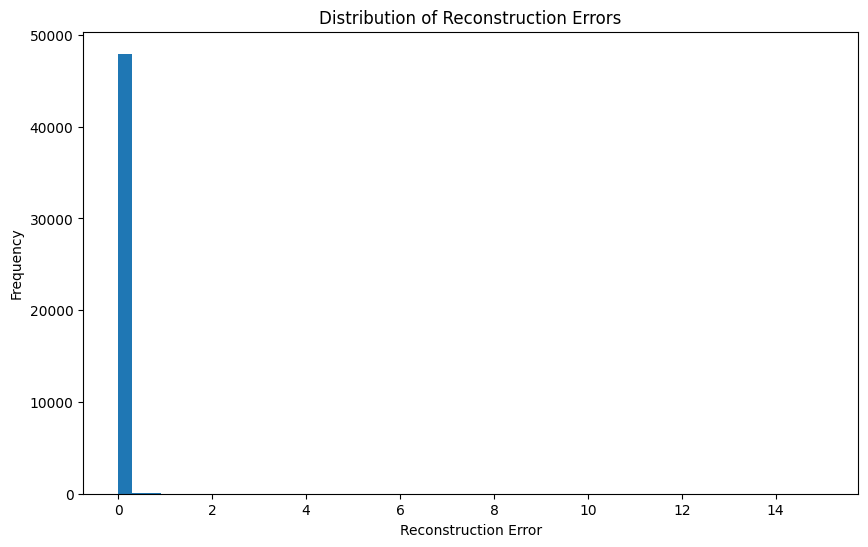


Number of potential anomalies: 146
Percentage of anomalies: 0.30%


In [38]:
# Plot reconstruction error distribution
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_error, bins=50)
plt.title('Distribution of Reconstruction Errors')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.show()

# Identify potential anomalies (samples with high reconstruction error)
threshold = np.mean(reconstruction_error) + 2 * np.std(reconstruction_error)
anomalies = reconstruction_error > threshold
print(f"\nNumber of potential anomalies: {np.sum(anomalies)}")
print(f"Percentage of anomalies: {(np.sum(anomalies) / len(anomalies)) * 100:.2f}%")

In [39]:
# Save the model
torch.save(model.state_dict(), 'autoencoder_model.pth')

# Save the scaler for future use
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [40]:
# Load the model
loaded_model = Autoencoder(input_dim)
loaded_model.load_state_dict(torch.load('autoencoder_model.pth'))
loaded_model.eval()

# Load the scaler
loaded_scaler = joblib.load('scaler.pkl')

In [42]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Modify the training loop to use GPU
def train_autoencoder(model, train_loader, criterion, optimizer, num_epochs=50, patience=5):
    model.train()
    train_losses = []
    best_loss = float('inf')
    patience_counter = 0
    
    for epoch in range(num_epochs):
        running_loss = 0.0
        for data, _ in train_loader:
            data = data.to(device)  # Move data to GPU
            # Forward pass
            outputs = model(data)
            loss = criterion(outputs, data)
            
            # Backward pass and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)
        
        # Early stopping
        if epoch_loss < best_loss:
            best_loss = epoch_loss
            patience_counter = 0
        else:
            patience_counter += 1
            
        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            break
            
        if (epoch + 1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')
    
    return train_losses

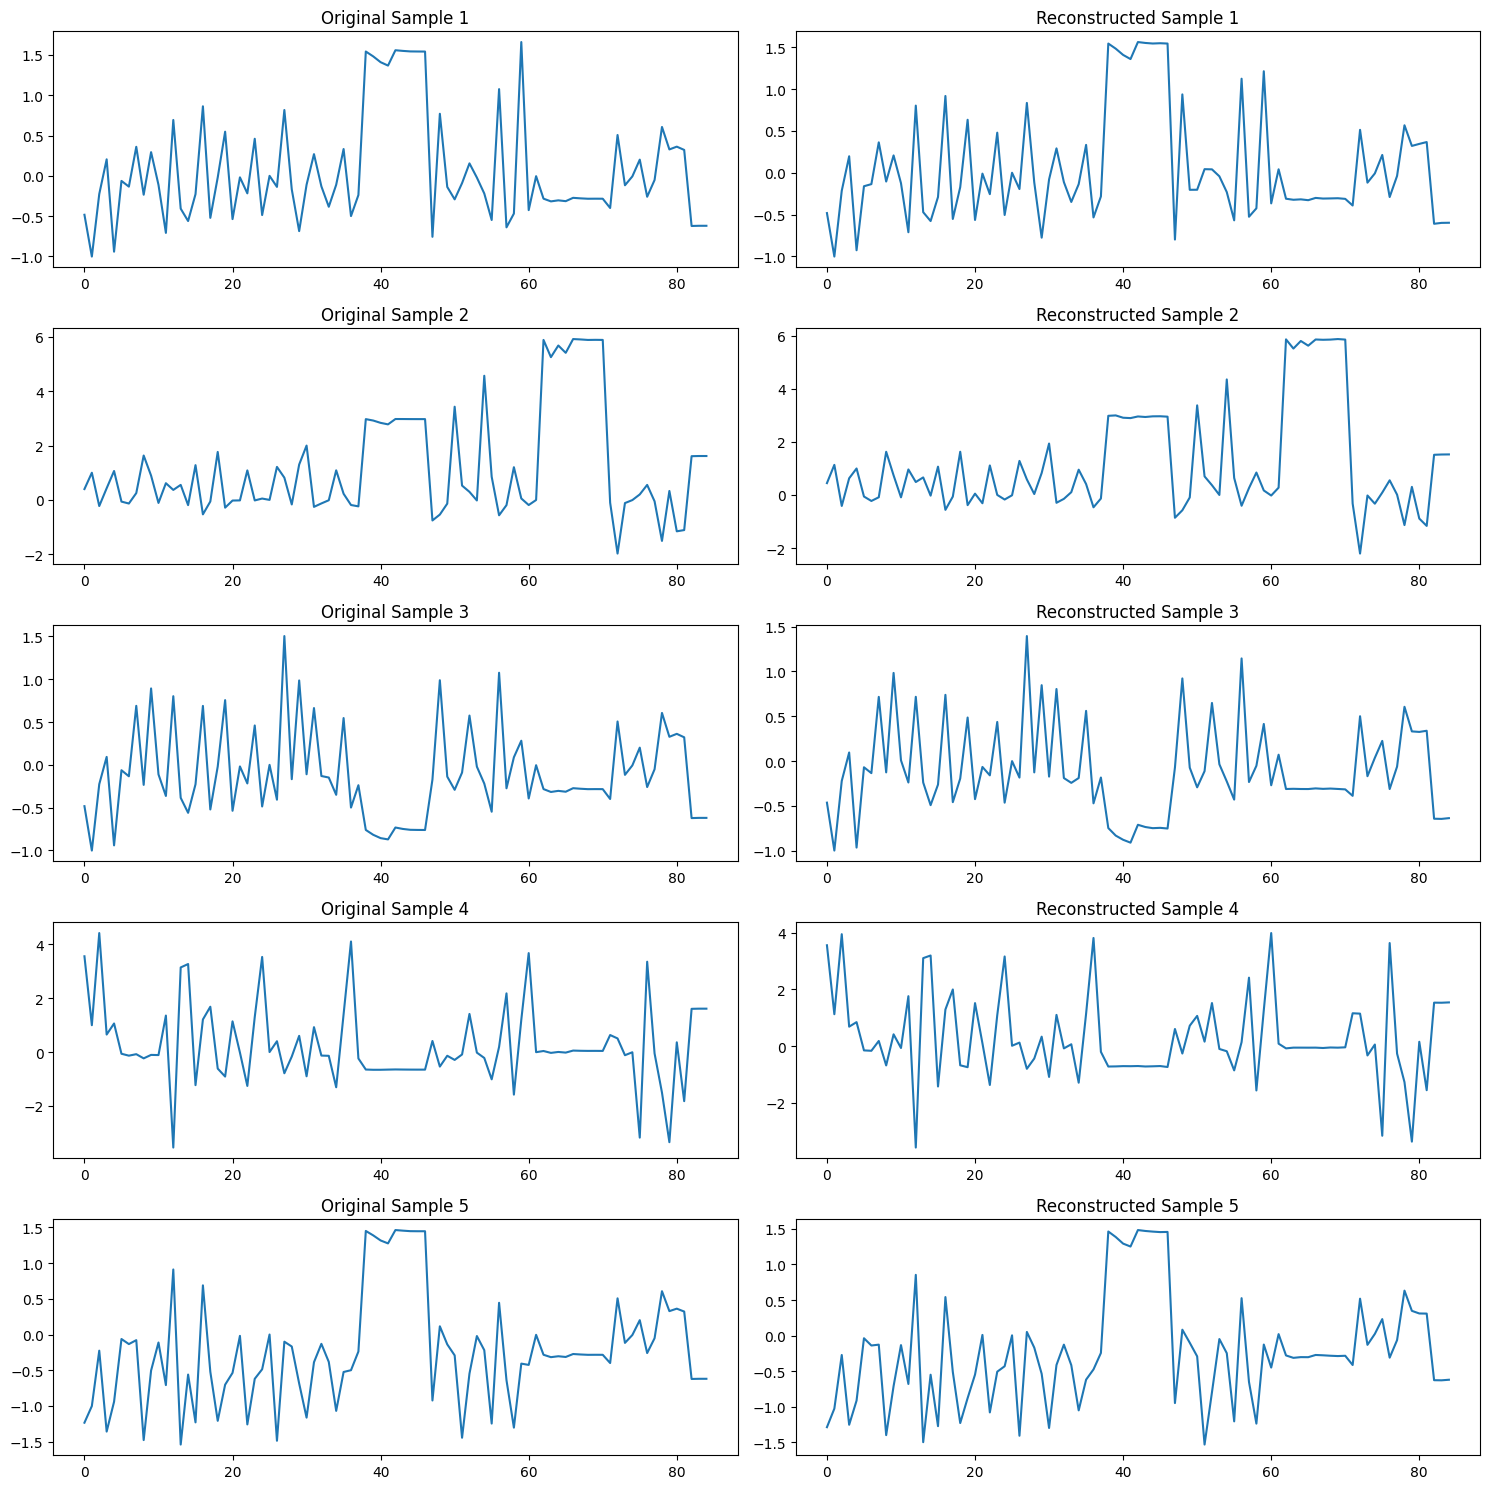

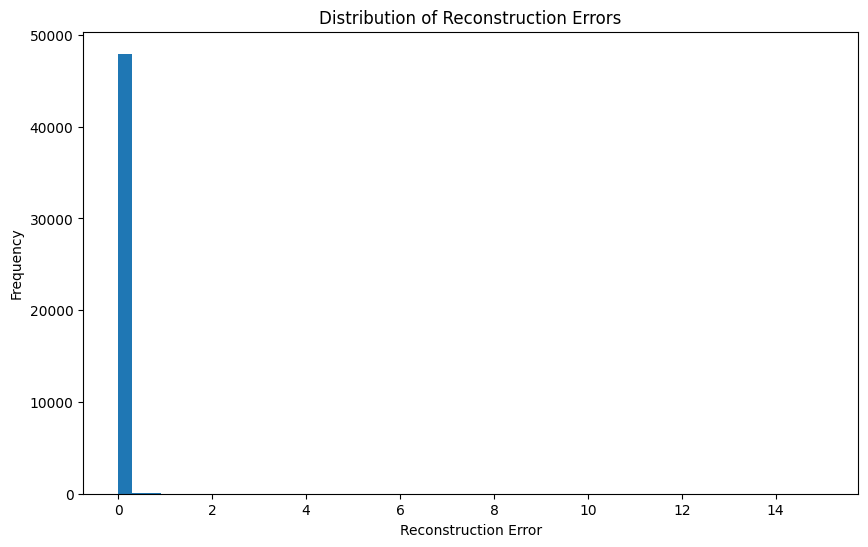


Reconstruction Error Statistics:
Mean: 0.0214
Std: 0.1248
Min: 0.0007
Max: 15.0058


In [43]:

# 1. Evaluate on test set
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    # Move test data to device
    X_test_tensor = X_test_tensor.to(device)
    
    # Get reconstructions
    test_reconstructions = model(X_test_tensor)
    
    # Calculate reconstruction error
    reconstruction_error = torch.mean((X_test_tensor - test_reconstructions) ** 2, dim=1)
    
    # Convert to numpy for easier plotting
    reconstruction_error = reconstruction_error.cpu().numpy()

# 2. Visualize some sample reconstructions
def plot_reconstruction(original, reconstructed, n_samples=5):
    # Convert to numpy and move to CPU if needed
    if torch.is_tensor(original):
        original = original.cpu().numpy()
    if torch.is_tensor(reconstructed):
        reconstructed = reconstructed.cpu().numpy()
    
    # Select random samples
    indices = np.random.choice(len(original), n_samples, replace=False)
    
    plt.figure(figsize=(15, 3*n_samples))
    for i, idx in enumerate(indices):
        plt.subplot(n_samples, 2, 2*i+1)
        plt.plot(original[idx])
        plt.title(f'Original Sample {i+1}')
        
        plt.subplot(n_samples, 2, 2*i+2)
        plt.plot(reconstructed[idx])
        plt.title(f'Reconstructed Sample {i+1}')
    
    plt.tight_layout()
    plt.show()

# Plot some reconstructions
plot_reconstruction(X_test_tensor, test_reconstructions)

# 3. Plot reconstruction error distribution
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_error, bins=50)
plt.title('Distribution of Reconstruction Errors')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.show()

# 4. Calculate and print some statistics
print("\nReconstruction Error Statistics:")
print(f"Mean: {np.mean(reconstruction_error):.4f}")
print(f"Std: {np.std(reconstruction_error):.4f}")
print(f"Min: {np.min(reconstruction_error):.4f}")
print(f"Max: {np.max(reconstruction_error):.4f}")



In [44]:
# Check the scaled data statistics
print("\nScaled Data Statistics:")
print(f"Mean: {np.mean(X_scaled):.4f}")
print(f"Std: {np.std(X_scaled):.4f}")
print(f"Min: {np.min(X_scaled):.4f}")
print(f"Max: {np.max(X_scaled):.4f}")


Scaled Data Statistics:
Mean: -0.0000
Std: 0.9941
Min: -23.5500
Max: 245.1545


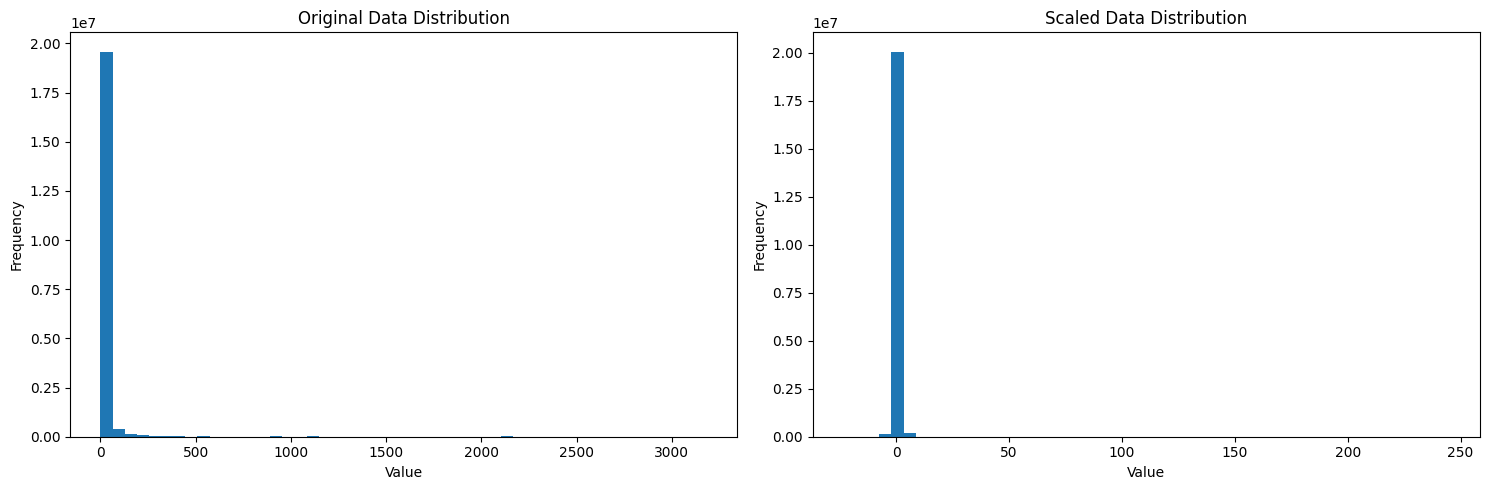

C:\Users\4 GIGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\4 GIGA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


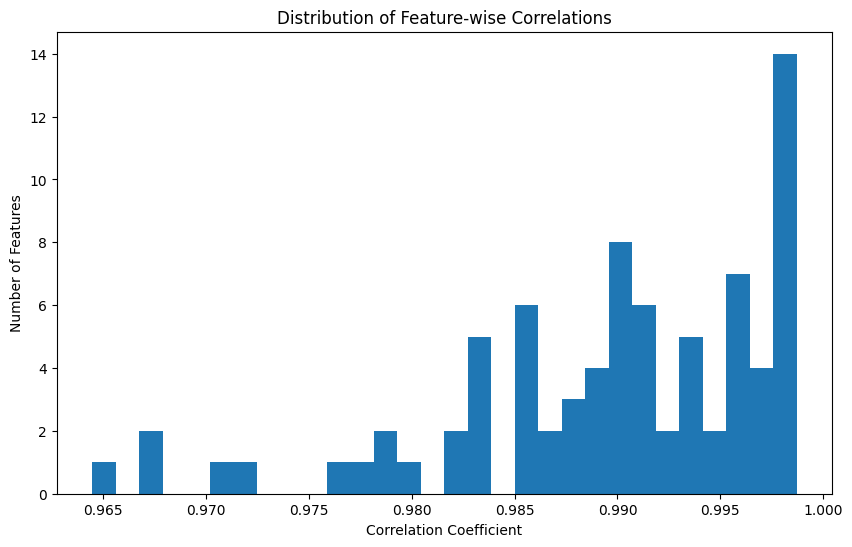


Correlation Statistics:
Mean correlation: nan
Min correlation: nan
Max correlation: nan


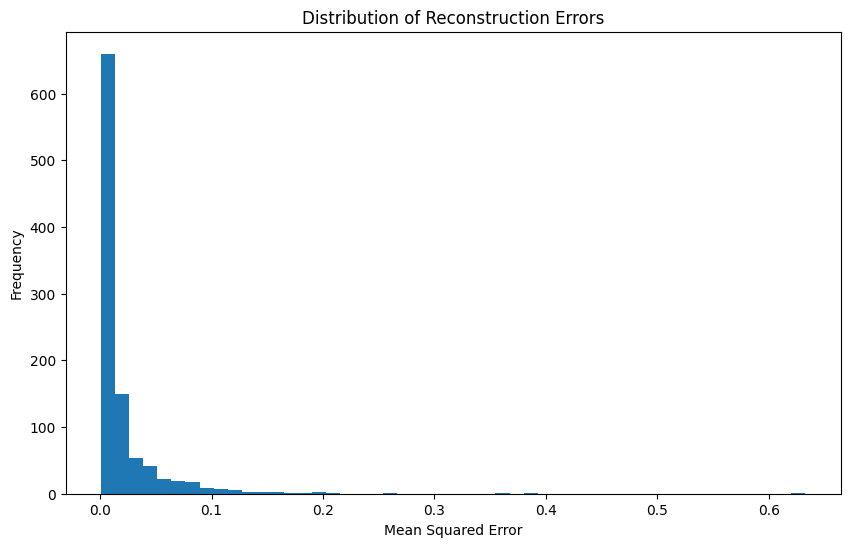


Model Architecture:
Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=85, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=16, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=16, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=85, bias=True)
  )
)

Training Loss Progression:
Epoch 0: 0.487306
Epoch 5: 0.069414
Epoch 10: 0.049833
Epoch 15: 0.043497
Epoch 20: 0.036630
Epoch 25: 0.032160
Epoch 30: 0.028213
Epoch 35: 0.024870
Epoch 40: 0.023023
Epoch 45: 0.023615


In [45]:
# 1. First, let's check the data distribution before scaling
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.hist(X.flatten(), bins=50)
plt.title('Original Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 2. Check the scaled data distribution
plt.subplot(1, 2, 2)
plt.hist(X_scaled.flatten(), bins=50)
plt.title('Scaled Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 3. Check correlation between original and reconstructed data
with torch.no_grad():
    # Get reconstructions for a sample of test data
    sample_size = min(1000, len(X_test_tensor))
    sample_indices = np.random.choice(len(X_test_tensor), sample_size, replace=False)
    sample_data = X_test_tensor[sample_indices].to(device)
    sample_reconstructions = model(sample_data)
    
    # Calculate correlation for each feature
    correlations = []
    for i in range(sample_data.shape[1]):
        corr = np.corrcoef(sample_data[:, i].cpu().numpy(), 
                          sample_reconstructions[:, i].cpu().numpy())[0, 1]
        correlations.append(corr)
    
    # Plot correlation distribution
    plt.figure(figsize=(10, 6))
    plt.hist(correlations, bins=30)
    plt.title('Distribution of Feature-wise Correlations')
    plt.xlabel('Correlation Coefficient')
    plt.ylabel('Number of Features')
    plt.show()
    
    print(f"\nCorrelation Statistics:")
    print(f"Mean correlation: {np.mean(correlations):.4f}")
    print(f"Min correlation: {np.min(correlations):.4f}")
    print(f"Max correlation: {np.max(correlations):.4f}")

# 4. Check reconstruction error distribution
reconstruction_errors = torch.mean((sample_data - sample_reconstructions) ** 2, dim=1)
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_errors.cpu().numpy(), bins=50)
plt.title('Distribution of Reconstruction Errors')
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency')
plt.show()

# 5. Print model architecture and parameters
print("\nModel Architecture:")
print(model)

# 6. Check if the model is actually training
print("\nTraining Loss Progression:")
for i, loss in enumerate(train_losses):
    if i % 5 == 0:  # Print every 5th epoch
        print(f"Epoch {i}: {loss:.6f}")

In [46]:
# 1. LSTM-based Autoencoder for temporal patterns
class LSTMAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_layers=2):
        super(LSTMAutoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True
        )
        
        # Decoder
        self.decoder = nn.LSTM(
            input_size=hidden_dim,
            hidden_size=input_dim,
            num_layers=num_layers,
            batch_first=True
        )
        
    def forward(self, x):
        # Encoder
        encoded, _ = self.encoder(x)
        
        # Decoder
        decoded, _ = self.decoder(encoded)
        return decoded

# 2. DLRM (Deep Learning Recommendation Model) for structured data
class DLRM(nn.Module):
    def __init__(self, num_features, embedding_dim=16):
        super(DLRM, self).__init__()
        
        # Embedding layers for categorical features
        self.embeddings = nn.ModuleList([
            nn.Embedding(num_embeddings, embedding_dim)
            for num_embeddings in categorical_sizes
        ])
        
        # Bottom MLP
        self.bottom_mlp = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU()
        )
        
        # Top MLP
        self.top_mlp = nn.Sequential(
            nn.Linear(64 + len(categorical_sizes) * embedding_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
        
    def forward(self, x):
        # Process embeddings
        embedded = [emb(x[:, i]) for i, emb in enumerate(self.embeddings)]
        embedded = torch.cat(embedded, dim=1)
        
        # Process continuous features
        continuous = self.bottom_mlp(x[:, len(self.embeddings):])
        
        # Combine and process
        combined = torch.cat([embedded, continuous], dim=1)
        return self.top_mlp(combined)

In [47]:
# Prepare data for LSTM
def prepare_sequence_data(data, sequence_length=10):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
    return torch.FloatTensor(sequences)

# Prepare data for DLRM
def prepare_dlrm_data(data, categorical_columns, continuous_columns):
    categorical_data = data[categorical_columns].values
    continuous_data = data[continuous_columns].values
    return torch.LongTensor(categorical_data), torch.FloatTensor(continuous_data)

In [48]:
# Prepare data for LSTM
def prepare_sequence_data(data, sequence_length=10):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
    return torch.FloatTensor(sequences)

# Prepare data for DLRM
def prepare_dlrm_data(data, categorical_columns, continuous_columns):
    categorical_data = data[categorical_columns].values
    continuous_data = data[continuous_columns].values
    return torch.LongTensor(categorical_data), torch.FloatTensor(continuous_data)

Model Training and evaluation Pipeline

In [49]:
class AnomalyDetectionPipeline:
    def __init__(self, model_type='autoencoder'):
        self.model_type = model_type
        self.models = {}
        self.scalers = {}
        
    def train_model(self, data, model_name):
        if self.model_type == 'lstm':
            model = LSTMAutoencoder(input_dim=data.shape[2])
        elif self.model_type == 'dlrm':
            model = DLRM(num_features=data.shape[1])
        else:
            model = Autoencoder(input_dim=data.shape[1])
            
        # Training code here
        return model
    
    def detect_anomalies(self, data, model_name, threshold):
        model = self.models[model_name]
        predictions = model(data)
        errors = self.calculate_reconstruction_error(data, predictions)
        return errors > threshold
    
    def save_pipeline(self, path):
        torch.save({
            'models': self.models,
            'scalers': self.scalers,
            'config': self.model_type
        }, path)
    
    @classmethod
    def load_pipeline(cls, path):
        checkpoint = torch.load(path)
        pipeline = cls(checkpoint['config'])
        pipeline.models = checkpoint['models']
        pipeline.scalers = checkpoint['scalers']
        return pipeline

API for Backend integration

In [50]:
class AnomalyDetectionPipeline:
    def __init__(self, model_type='autoencoder'):
        self.model_type = model_type
        self.models = {}
        self.scalers = {}
        
    def train_model(self, data, model_name):
        if self.model_type == 'autoencoder':
            model = Autoencoder(input_dim=data.shape[1])
        # Add other model types as needed
        
        # Training code here
        return model
    
    def detect_anomalies(self, data, model_name, threshold):
        model = self.models[model_name]
        model.eval()  # Set to evaluation mode
        with torch.no_grad():
            predictions = model(data)
            errors = torch.mean((data - predictions) ** 2, dim=1)
        return errors > threshold
    
    def save_pipeline(self, path):
        # Save model state dict instead of the whole model
        torch.save({
            'model_state_dict': self.models['main_model'].state_dict(),
            'config': self.model_type
        }, path)
    
    @classmethod
    def load_pipeline(cls, path):
        # Add Autoencoder to safe globals
        torch.serialization.add_safe_globals([Autoencoder])
        
        # Load the checkpoint
        checkpoint = torch.load(path, weights_only=False)  # Set weights_only to False
        
        # Create pipeline instance
        pipeline = cls(checkpoint['config'])
        
        # Create model instance
        if checkpoint['config'] == 'autoencoder':
            model = Autoencoder(input_dim=85)  # Replace 85 with your actual input dimension
            model.load_state_dict(checkpoint['model_state_dict'])
            pipeline.models['main_model'] = model
        
        return pipeline

In [51]:
# Create and save the pipeline
pipeline = AnomalyDetectionPipeline(model_type='autoencoder')
model = pipeline.train_model(X_train_tensor, 'main_model')
pipeline.models['main_model'] = model
pipeline.save_pipeline('anomaly_detection_pipeline.pth')

In [46]:
'''
from fastapi import FastAPI, HTTPException
import uvicorn
import torch
import numpy as np
import nest_asyncio

# Apply nest_asyncio to allow running async code in Jupyter
nest_asyncio.apply()

app = FastAPI()

# Create a new pipeline instance
pipeline = AnomalyDetectionPipeline(model_type='autoencoder')

# Load the saved pipeline
try:
    # Add Autoencoder to safe globals before loading
    torch.serialization.add_safe_globals([Autoencoder])
    pipeline = AnomalyDetectionPipeline.load_pipeline('anomaly_detection_pipeline.pth')
except FileNotFoundError:
    print("Warning: No saved pipeline found. Using untrained model.")
except Exception as e:
    print(f"Error loading pipeline: {str(e)}")
    print("Using untrained model.")

@app.post("/detect_anomalies")
async def detect_anomalies(data: dict):
    try:
        # Convert input data to tensor
        input_data = torch.FloatTensor(data['features'])
        
        # Detect anomalies
        anomalies = pipeline.detect_anomalies(
            input_data,
            model_name='main_model',
            threshold=0.1449  # 95th percentile threshold
        )
        
        return {
            "anomalies_detected": bool(anomalies.any()),
            "anomaly_scores": anomalies.tolist(),
            "threshold": 0.1449
        }
    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))

# Run the API
if __name__ == "__main__":
    uvicorn.run(app, host="0.0.0.0", port=8000)
'''

'\nfrom fastapi import FastAPI, HTTPException\nimport uvicorn\nimport torch\nimport numpy as np\nimport nest_asyncio\n\n# Apply nest_asyncio to allow running async code in Jupyter\nnest_asyncio.apply()\n\napp = FastAPI()\n\n# Create a new pipeline instance\npipeline = AnomalyDetectionPipeline(model_type=\'autoencoder\')\n\n# Load the saved pipeline\ntry:\n    # Add Autoencoder to safe globals before loading\n    torch.serialization.add_safe_globals([Autoencoder])\n    pipeline = AnomalyDetectionPipeline.load_pipeline(\'anomaly_detection_pipeline.pth\')\nexcept FileNotFoundError:\n    print("Warning: No saved pipeline found. Using untrained model.")\nexcept Exception as e:\n    print(f"Error loading pipeline: {str(e)}")\n    print("Using untrained model.")\n\n@app.post("/detect_anomalies")\nasync def detect_anomalies(data: dict):\n    try:\n        # Convert input data to tensor\n        input_data = torch.FloatTensor(data[\'features\'])\n\n        # Detect anomalies\n        anomalies 